In [1]:
## Imports
import math
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
## Pay-to-exit research questions
## RQ1 For an adversary with \alpha stake, how much does it need to pay to
## exiting validators to achieve \alpha'\leq0.33 stake in the system? In this scenario the adversary would 
## reimburse all expected rewards to the validator for the next 1-2-3 (TBD) years (discounted at present value).
## RQ2 The same as in RQ1 but the adversary only reimburses the opportunity cost, i.e.,
## say the difference between validator rewards - Uniswap LP rewards (assuming Uniswap LP is the 2nd best option for validators).

In [3]:
## Best resource on the protocol: https://eth2book.info/latest/book.pdf

In [4]:
## Pay-to-fork research questions
## RQ1 how much the adversary needs to pay for buying X attestations?
## RQ2 Same as RQ1 but the adversary also needs to cover attestation equivocation penalties for these X bought attestations.

In [5]:
## Some constants that we deem given (maybe periodically update)
stakedETHamount = 34385053 ## (2025.04.01) taken from here https://dune.com/hildobby/eth2-staking 
noOfValidators = 1074533 ## (2025.04.01) taken from here https://dune.com/hildobby/eth2-staking
noEpochsPerYear = 82181.25
maxIssuancePerYear = 940.8659*math.sqrt(noOfValidators) ## the constant is coming from epochs per year (roughly)
APR = 2940.21/math.sqrt(noOfValidators)
proposerReward = 0
attestationReward = 0
W_s = 14 # weights page 100
W_t = 26
W_h = 14
W_y = 3 ## sync reward weight
W_p = 12.5 ## proposer weight
W_Sigma = 64 ## defined at page 109
T = stakedETHamount ## defined at page 102
n = 32 ## number of increments (the validator's balance is assumed to be 32 ETH uniformly (for the sake of simplicity))
base_reward_factor = 64 ## https://ethereum.stackexchange.com/questions/153722/base-reward-formula-enquiry
b = (1000000000*base_reward_factor)/math.sqrt(32000000000*noOfValidators) ## base reward per increment
## Attestation penalties page 109 in eth2book
attestation_missing_penalty = 0.625*T*b ## page 107
wrong_source_attestation = (-W_s-W_t)/W_Sigma
MIN_SLASHING_PENALTY_QUOTIENT_BELLATRIX = 1/32 ##defined at page 116
## correlation penalty page 117
## other penalties

In [6]:
## Relevant Pectra-EIPs for this work
## EIP-7002
## EIP-7549 Move the committee index out of the signature: more efficient attestation/signature aggregation 

In [7]:
print(maxIssuancePerYear,"ETH issued per year")
print(APR,"% APR")

975298.6148563978 ETH issued per year
2.8364064971488903 % APR


In [8]:
print(base_reward_factor)

64


In [9]:
def getMaxIssuancePerYear(noOfValidators):
    return 940.8659*math.sqrt(noOfValidators)

In [10]:
def getAPR(noOfValidators):
    return 2940.21/math.sqrt(noOfValidators)

In [14]:
nowValidators = 1074533
noOfBribedValidators = 300000
oneYearRewards = [32*getAPR(i)/100 for i in range(nowValidators,nowValidators-noOfBribedValidators,-1)]
bribeAmounts = [sum(oneYearRewards[:i]) for i in range(len(oneYearRewards))]

<>:2: SyntaxWarning: invalid escape sequence '\#'
<>:2: SyntaxWarning: invalid escape sequence '\#'
/var/folders/fb/05k260gx67s5jxx5m1hfs7400000gn/T/ipykernel_5405/2351514803.py:2: SyntaxWarning: invalid escape sequence '\#'
  plt.xlabel("$\#$Bribed Validators")


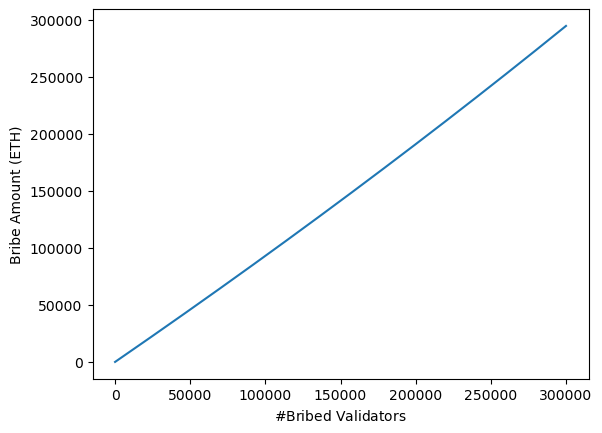

In [15]:
plt.plot(bribeAmounts)
plt.xlabel("$\#$Bribed Validators")
plt.ylabel("Bribe Amount (ETH)")
plt.show()